# Check `quick` maps (histogram maps without smoothing)

In [9]:
# #import functions from module
# import sys
# sys.path.append('/Users/fardila/Documents/GitHub/HSC_vs_hydro/')
# from functions import *

import numpy as np
import os
import pickle
import h5py
import matplotlib.pyplot as plt

%matplotlib inline 
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
Illustris_file_quick = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/galaxies_stellarmaps_orig_11.2.hdf5'

In [4]:
f = h5py.File(Illustris_file_quick, 'r')
n_galaxies = len(f['catsh_id'])
cat_sh_mstar = np.array(f['catsh_SubhaloMassType'][:, 4])

map_size = f['config'].attrs['map_range_min']
n_pixels = f['config'].attrs['map_npixel']
pixel_scale=2 * (map_size/n_pixels)
f.close()

print "number of galaxies: ", n_galaxies
print "map size in pixels: ", n_pixels
print "map size in kpc: ", map_size
print "pixel scale: ", pixel_scale

number of galaxies:  339
map size in pixels:  300
map size in kpc:  800.0
pixel scale:  5.33333333333


## get masses from pickels 

In [ ]:
#open pickels
illustris_masses_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/Illustris_masses_quick.pkl'
illustris_isos_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/Illustris_isos_quick.pkl'

tng_masses_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/TNG_masses_quick.pkl'
tng_isos_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/TNG_isos_quick.pkl'

def open_pkl(file_name):
    pkl = open(file_name,'rb')
    array = pickle.load(pkl)
    pkl.close()  
    return array

In [17]:
illustris_masses = open_pkl(illustris_masses_file)
illustris_isos = open_pkl(illustris_isos_file)

In [18]:
#masses = [m_cat, m_post, m_post_icl, m_1d_10, m_1d_30, m_1d_100, m_2d_10, m_2d_30, m_2d_100, extrap_mass]
illustris_m_cat =  np.array([gal[0] for gal in illustris_masses])
illustris_m_post =  np.array([gal[1] for gal in illustris_masses])
illustris_m_post_icl =  np.array([gal[2] for gal in illustris_masses])
illustris_m_1d_30 = np.array([gal[4] for gal in illustris_masses])
illustris_m_1d_100 = np.array([gal[5] for gal in illustris_masses])
illustris_m_2d_30 = np.array([gal[7] for gal in illustris_masses])
illustris_m_2d_100 = np.array([gal[8] for gal in illustris_masses])
illustris_m_extrap = np.array([gal[9] for gal in illustris_masses])


#for paper: 
illustris_diff_cat_post = illustris_m_cat-illustris_m_post
illustris_diff_cat_post_icl = illustris_m_cat-illustris_m_post_icl
illustris_diff_cat_1d100 = illustris_m_cat-illustris_m_1d_100
illustris_diff_2d_1d_30 = illustris_m_2d_30-illustris_m_1d_30
illustris_diff_2d_1d_100 = illustris_m_2d_100-illustris_m_1d_100
illustris_diff_cat_1dextrap = illustris_m_cat-illustris_m_extrap

#mask out failed mass measurements
illustris_diff_cat_post = illustris_diff_cat_post[illustris_diff_cat_post<100]
illustris_diff_cat_post_icl = illustris_diff_cat_post_icl[illustris_diff_cat_post_icl<100]
illustris_diff_cat_1d100 = illustris_diff_cat_1d100[illustris_diff_cat_1d100<100]
illustris_diff_2d_1d_30 = illustris_diff_2d_1d_30[illustris_diff_2d_1d_30<100]
illustris_diff_cat_1dextrap = illustris_diff_cat_1dextrap[illustris_diff_cat_1dextrap<100]

## PLOTS 

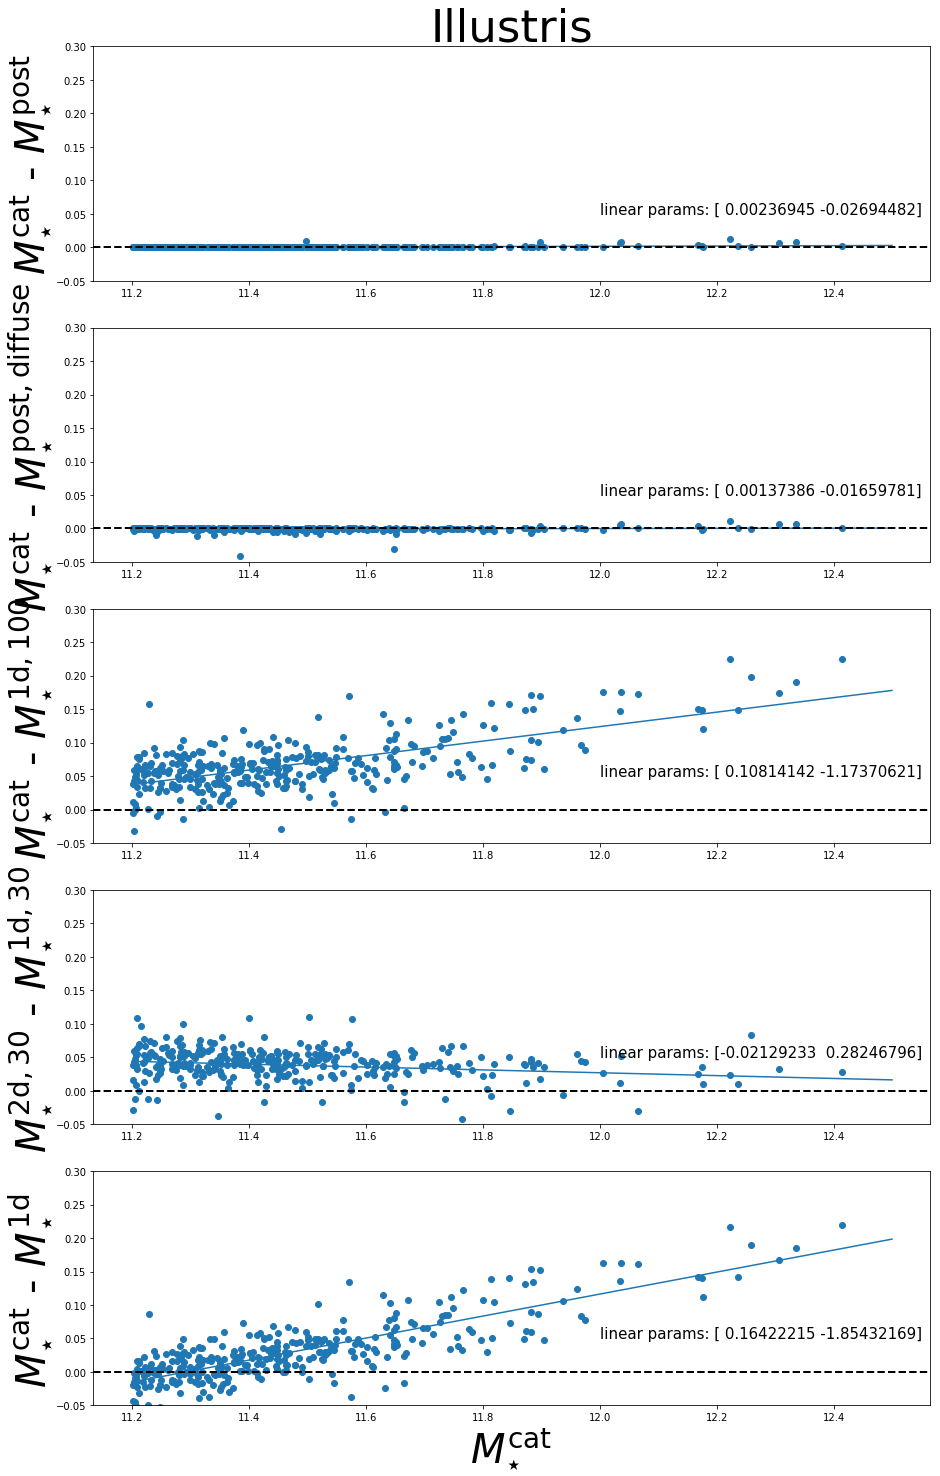

In [20]:
illustris_diff_cat_post = illustris_m_cat-illustris_m_post
illustris_diff_cat_post_icl = illustris_m_cat-illustris_m_post_icl
illustris_diff_cat_1d100 = illustris_m_cat-illustris_m_1d_100
illustris_diff_2d_1d_30 = illustris_m_2d_30-illustris_m_1d_30
illustris_diff_cat_1dextrap = illustris_m_cat-illustris_m_extrap


#fit lines
xs=np.linspace(11.2,12.5,100)

illustris_diff_cat_post_params = np.polyfit(illustris_m_cat[illustris_diff_cat_post<100], 
                                            illustris_diff_cat_post[illustris_diff_cat_post<100],1)
illustris_diff_cat_post_line = np.poly1d(illustris_diff_cat_post_params)
########################################################################
illustris_diff_cat_post_icl_params = np.polyfit(illustris_m_cat[illustris_diff_cat_post_icl<100], 
                                                illustris_diff_cat_post_icl[illustris_diff_cat_post_icl<100], 1)
illustris_diff_cat_post_icl_line = np.poly1d(illustris_diff_cat_post_icl_params)
########################################################################
illustris_diff_cat_1d100_params = np.polyfit(illustris_m_cat[illustris_diff_cat_1d100<100], 
                                                illustris_diff_cat_1d100[illustris_diff_cat_1d100<100], 1)
illustris_diff_cat_1d100_line = np.poly1d(illustris_diff_cat_1d100_params)
########################################################################
illustris_diff_2d_1d_30_params = np.polyfit(illustris_m_cat[illustris_diff_2d_1d_30<100], 
                                                illustris_diff_2d_1d_30[illustris_diff_2d_1d_30<100], 1)
illustris_diff_2d_1d_30_line = np.poly1d(illustris_diff_2d_1d_30_params)
########################################################################
illustris_diff_cat_1dextrap_params = np.polyfit(illustris_m_cat[illustris_diff_cat_1dextrap<100], 
                                                illustris_diff_cat_1dextrap[illustris_diff_cat_1dextrap<100], 1)
illustris_diff_cat_1dextrap_line = np.poly1d(illustris_diff_cat_1dextrap_params)

plt.figure(figsize=[15,25])
ax1=plt.subplot(511)
ax2=plt.subplot(512)
ax3=plt.subplot(513)
ax4=plt.subplot(514)
ax5=plt.subplot(515)


ax1.scatter(illustris_m_cat[illustris_diff_cat_post<100], illustris_diff_cat_post[illustris_diff_cat_post<100])
ax1.plot(xs, illustris_diff_cat_post_line(xs))
ax1.axhline(0,c="k",linewidth=2,linestyle='--')
ax1.text(12, 0.05,'linear params: ' + str(illustris_diff_cat_post_params), fontsize=15)
ax1.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{post}}$', fontsize=40)

ax2.scatter(illustris_m_cat[illustris_diff_cat_post_icl<100], illustris_diff_cat_post_icl[illustris_diff_cat_post_icl<100])
ax2.plot(xs, illustris_diff_cat_post_icl_line(xs))
ax2.axhline(0,c="k",linewidth=2,linestyle='--')
ax2.text(12, 0.05,'linear params: ' + str(illustris_diff_cat_post_icl_params), fontsize=15)
ax2.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{post, diffuse}}$ ', fontsize=40)

ax3.scatter(illustris_m_cat[illustris_diff_cat_1d100<100], illustris_diff_cat_1d100[illustris_diff_cat_1d100<100])
ax3.plot(xs, illustris_diff_cat_1d100_line(xs))
ax3.axhline(0, c="k",linewidth=2, linestyle='--')
ax3.text(12, 0.05,'linear params: ' + str(illustris_diff_cat_1d100_params), fontsize=15)
ax3.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{1d, 100}}$ ', fontsize=40)

ax4.scatter(illustris_m_cat[illustris_diff_2d_1d_30<100], illustris_diff_2d_1d_30[illustris_diff_2d_1d_30<100])
ax4.plot(xs, illustris_diff_2d_1d_30_line(xs))
ax4.axhline(0,c="k",linewidth=2,linestyle='--')
ax4.text(12, 0.05,'linear params: ' + str(illustris_diff_2d_1d_30_params), fontsize=15)
ax4.set_ylabel(r'$M_{\star}^{\mathrm{2d, 30}}$ - $M_{\star}^{\mathrm{1d, 30}}$ ', fontsize=40)

ax5.scatter(illustris_m_cat[illustris_diff_cat_1dextrap<100], illustris_diff_cat_1dextrap[illustris_diff_cat_1dextrap<100])
ax5.plot(xs, illustris_diff_cat_1dextrap_line(xs))
ax5.axhline(0,c="k",linewidth=2,linestyle='--')
ax5.text(12, 0.05,'linear params: ' + str(illustris_diff_cat_1dextrap_params), fontsize=15)
ax5.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{1d}}$ ', fontsize=40)




ax5.set_xlabel('$M_{\star}^{\mathrm{cat}}$', fontsize=40)
ax1.set_title('Illustris', fontsize=45)
#plt.tight_layout()

for ax in [ax1,ax2,ax3,ax4,ax5]:
    ax.set_ylim([-0.05,0.3])

## other 2D mass checks

In [25]:
illustris_m_1d_10 = np.array([gal[3] for gal in illustris_masses])
illustris_m_1d_30 = np.array([gal[4] for gal in illustris_masses])
illustris_m_1d_100 = np.array([gal[5] for gal in illustris_masses])
illustris_m_2d_10 = np.array([gal[6] for gal in illustris_masses])
illustris_m_2d_30 = np.array([gal[7] for gal in illustris_masses])
illustris_m_2d_100 = np.array([gal[8] for gal in illustris_masses])

illustris_diff_2d_1d_10 = illustris_m_2d_10-illustris_m_1d_10
illustris_diff_2d_1d_30 = illustris_m_2d_30-illustris_m_1d_30
illustris_diff_2d_1d_100 = illustris_m_2d_100-illustris_m_1d_100

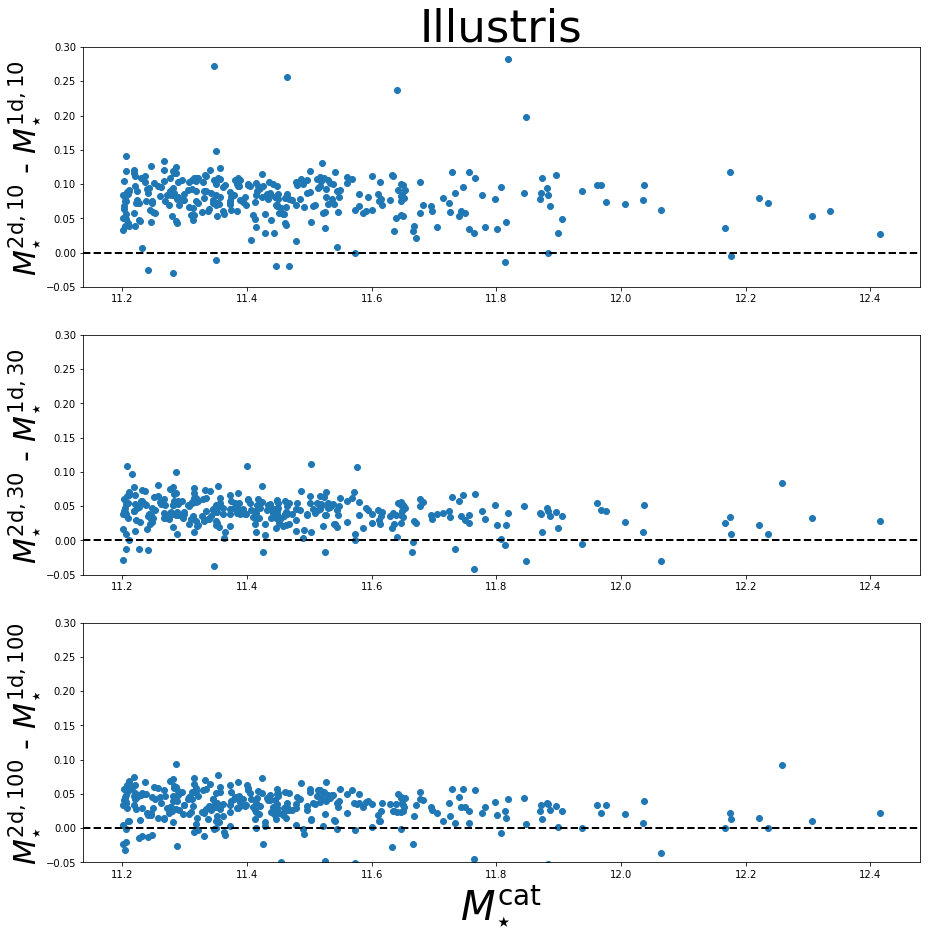

In [32]:
plt.figure(figsize=[15,15])
ax1=plt.subplot(311)
ax2=plt.subplot(312)
ax3=plt.subplot(313)

ax1.scatter(illustris_m_cat[illustris_diff_2d_1d_10<100], illustris_diff_2d_1d_10[illustris_diff_2d_1d_10<100])
# ax1.plot(xs, illustris_diff_cat_post_line(xs))
ax1.axhline(0,c="k",linewidth=2,linestyle='--')
# ax1.text(12, 0.05,'linear params: ' + str(illustris_diff_cat_post_params), fontsize=15)
ax1.set_ylabel(r'$M_{\star}^{\mathrm{2d, 10}}$ - $M_{\star}^{\mathrm{1d, 10}}$ ', fontsize=30)

ax2.scatter(illustris_m_cat[illustris_diff_2d_1d_30<100], illustris_diff_2d_1d_30[illustris_diff_2d_1d_30<100])
# ax2.plot(xs, illustris_diff_cat_post_icl_line(xs))
ax2.axhline(0,c="k",linewidth=2,linestyle='--')
# ax2.text(12, 0.05,'linear params: ' + str(illustris_diff_cat_post_icl_params), fontsize=15)
ax2.set_ylabel(r'$M_{\star}^{\mathrm{2d, 30}}$ - $M_{\star}^{\mathrm{1d, 30}}$ ', fontsize=30)

ax3.scatter(illustris_m_cat[illustris_diff_2d_1d_100<100], illustris_diff_2d_1d_100[illustris_diff_2d_1d_100<100])
# ax3.plot(xs, illustris_diff_cat_1d100_line(xs))
ax3.axhline(0, c="k",linewidth=2, linestyle='--')
# ax3.text(12, 0.05,'linear params: ' + str(illustris_diff_cat_1d100_params), fontsize=15)
ax3.set_ylabel(r'$M_{\star}^{\mathrm{2d, 100}}$ - $M_{\star}^{\mathrm{1d, 100}}$ ', fontsize=30)




ax3.set_xlabel('$M_{\star}^{\mathrm{cat}}$', fontsize=40)
ax1.set_title('Illustris', fontsize=45)
#plt.tight_layout()

for ax in [ax1,ax2,ax3]:
    ax.set_ylim([-0.05,0.3])

# TNG

In [22]:
tng_masses = open_pkl(tng_masses_file)
tng_isos = open_pkl(tng_isos_file)

In [23]:
tng_m_cat =  np.array([gal[0] for gal in tng_masses])
tng_m_post =  np.array([gal[1] for gal in tng_masses])
tng_m_post_icl =  np.array([gal[2] for gal in tng_masses])
tng_m_1d_30 = np.array([gal[4] for gal in tng_masses])
tng_m_1d_100 = np.array([gal[5] for gal in tng_masses])
tng_m_2d_30 = np.array([gal[7] for gal in tng_masses])
tng_m_2d_100 = np.array([gal[8] for gal in tng_masses])
tng_m_extrap = np.array([gal[9] for gal in tng_masses])


#for paper: 
tng_diff_cat_post = tng_m_cat-tng_m_post
tng_diff_cat_post_icl = tng_m_cat-tng_m_post_icl
tng_diff_cat_1d100 = tng_m_cat-tng_m_1d_100
tng_diff_2d_1d_30 = tng_m_2d_30-tng_m_1d_30
tng_diff_2d_1d_100 = tng_m_2d_100-tng_m_1d_100
tng_diff_cat_1dextrap = tng_m_cat-tng_m_extrap

#mask out failed mass measurements
tng_diff_cat_post = tng_diff_cat_post[tng_diff_cat_post<100]
tng_diff_cat_post_icl = tng_diff_cat_post_icl[tng_diff_cat_post_icl<100]
tng_diff_cat_1d100 = tng_diff_cat_1d100[tng_diff_cat_1d100<100]
tng_diff_2d_1d_30 = tng_diff_2d_1d_30[tng_diff_2d_1d_30<100]
tng_diff_cat_1dextrap = tng_diff_cat_1dextrap[tng_diff_cat_1dextrap<100]

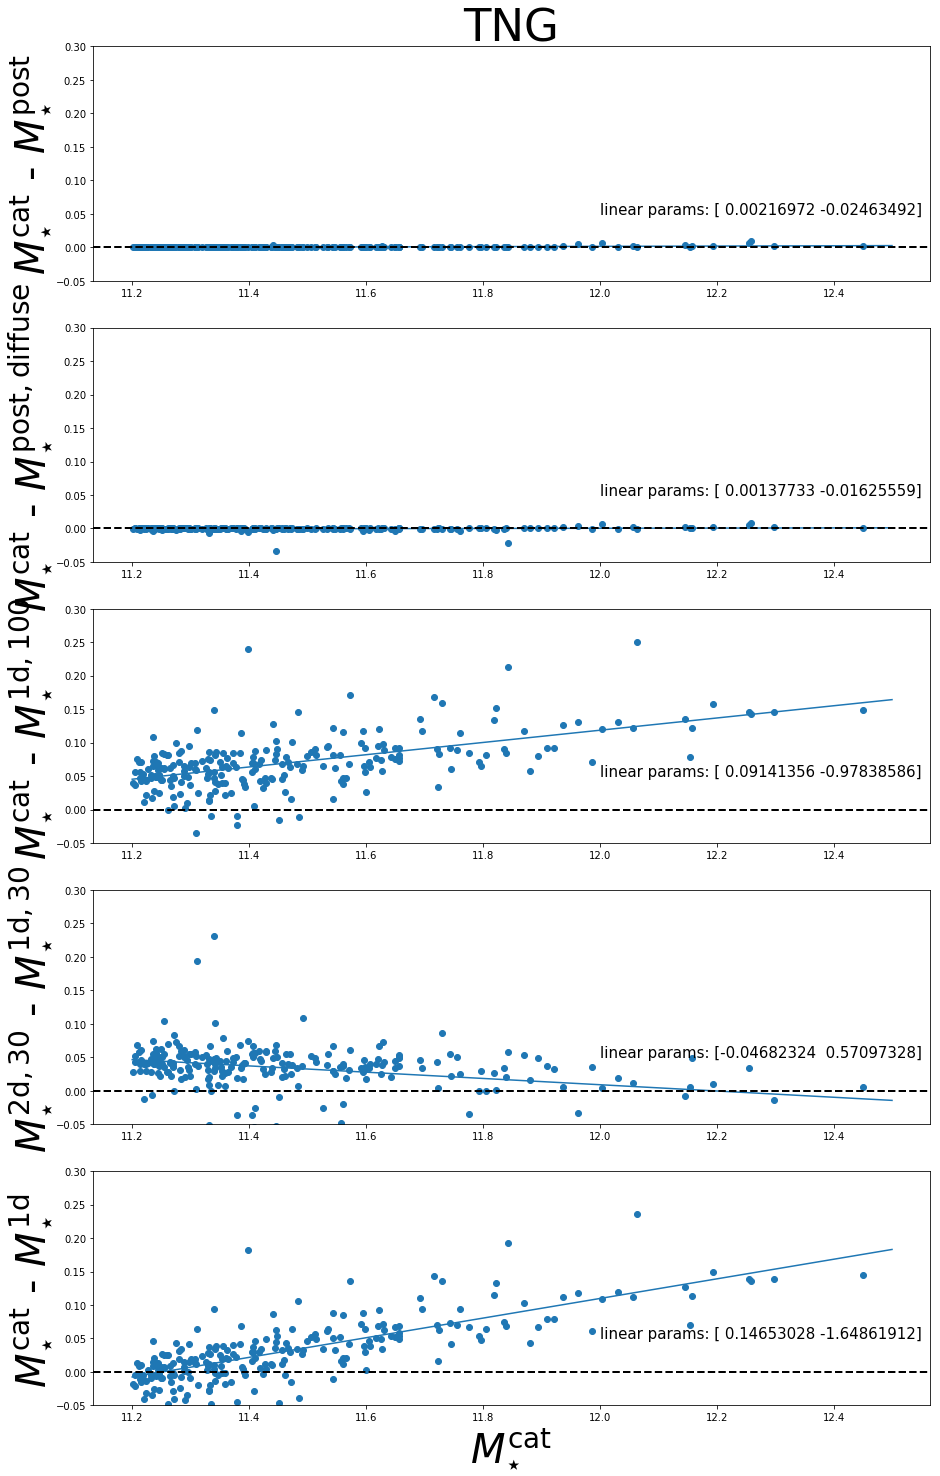

In [24]:
tng_diff_cat_post = tng_m_cat-tng_m_post
tng_diff_cat_post_icl = tng_m_cat-tng_m_post_icl
tng_diff_cat_1d100 = tng_m_cat-tng_m_1d_100
tng_diff_2d_1d_30 = tng_m_2d_30-tng_m_1d_30
tng_diff_cat_1dextrap = tng_m_cat-tng_m_extrap

#fit lines
xs=np.linspace(11.2,12.5,100)

tng_diff_cat_post_params = np.polyfit(tng_m_cat[tng_diff_cat_post<100], 
                                            tng_diff_cat_post[tng_diff_cat_post<100],1)
tng_diff_cat_post_line = np.poly1d(tng_diff_cat_post_params)
########################################################################
tng_diff_cat_post_icl_params = np.polyfit(tng_m_cat[tng_diff_cat_post_icl<100], 
                                                tng_diff_cat_post_icl[tng_diff_cat_post_icl<100], 1)
tng_diff_cat_post_icl_line = np.poly1d(tng_diff_cat_post_icl_params)
########################################################################
tng_diff_cat_1d100_params = np.polyfit(tng_m_cat[tng_diff_cat_1d100<100], 
                                                tng_diff_cat_1d100[tng_diff_cat_1d100<100], 1)
tng_diff_cat_1d100_line = np.poly1d(tng_diff_cat_1d100_params)
########################################################################
tng_diff_2d_1d_30_params = np.polyfit(tng_m_cat[tng_diff_2d_1d_30<100], 
                                                tng_diff_2d_1d_30[tng_diff_2d_1d_30<100], 1)
tng_diff_2d_1d_30_line = np.poly1d(tng_diff_2d_1d_30_params)
########################################################################
tng_diff_cat_1dextrap_params = np.polyfit(tng_m_cat[tng_diff_cat_1dextrap<100], 
                                                tng_diff_cat_1dextrap[tng_diff_cat_1dextrap<100], 1)
tng_diff_cat_1dextrap_line = np.poly1d(tng_diff_cat_1dextrap_params)

plt.figure(figsize=[15,25])
ax1=plt.subplot(511)
ax2=plt.subplot(512)
ax3=plt.subplot(513)
ax4=plt.subplot(514)
ax5=plt.subplot(515)


ax1.scatter(tng_m_cat[tng_diff_cat_post<100], tng_diff_cat_post[tng_diff_cat_post<100])
ax1.plot(xs, tng_diff_cat_post_line(xs))
ax1.axhline(0,c="k",linewidth=2,linestyle='--')
ax1.text(12, 0.05,'linear params: ' + str(tng_diff_cat_post_params), fontsize=15)
ax1.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{post}}$', fontsize=40)

ax2.scatter(tng_m_cat[tng_diff_cat_post_icl<100], tng_diff_cat_post_icl[tng_diff_cat_post_icl<100])
ax2.plot(xs, tng_diff_cat_post_icl_line(xs))
ax2.axhline(0,c="k",linewidth=2,linestyle='--')
ax2.text(12, 0.05,'linear params: ' + str(tng_diff_cat_post_icl_params), fontsize=15)
ax2.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{post, diffuse}}$ ', fontsize=40)

ax3.scatter(tng_m_cat[tng_diff_cat_1d100<100], tng_diff_cat_1d100[tng_diff_cat_1d100<100])
ax3.plot(xs, tng_diff_cat_1d100_line(xs))
ax3.axhline(0, c="k",linewidth=2, linestyle='--')
ax3.text(12, 0.05,'linear params: ' + str(tng_diff_cat_1d100_params), fontsize=15)
ax3.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{1d, 100}}$ ', fontsize=40)

ax4.scatter(tng_m_cat[tng_diff_2d_1d_30<100], tng_diff_2d_1d_30[tng_diff_2d_1d_30<100])
ax4.plot(xs, tng_diff_2d_1d_30_line(xs))
ax4.axhline(0,c="k",linewidth=2,linestyle='--')
ax4.text(12, 0.05,'linear params: ' + str(tng_diff_2d_1d_30_params), fontsize=15)
ax4.set_ylabel(r'$M_{\star}^{\mathrm{2d, 30}}$ - $M_{\star}^{\mathrm{1d, 30}}$ ', fontsize=40)

ax5.scatter(tng_m_cat[tng_diff_cat_1dextrap<100], tng_diff_cat_1dextrap[tng_diff_cat_1dextrap<100])
ax5.plot(xs, tng_diff_cat_1dextrap_line(xs))
ax5.axhline(0,c="k",linewidth=2,linestyle='--')
ax5.text(12, 0.05,'linear params: ' + str(tng_diff_cat_1dextrap_params), fontsize=15)
ax5.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{1d}}$ ', fontsize=40)




ax5.set_xlabel('$M_{\star}^{\mathrm{cat}}$', fontsize=40)
ax1.set_title('TNG', fontsize=45)
#plt.tight_layout()

for ax in [ax1,ax2,ax3,ax4,ax5]:
    ax.set_ylim([-0.05,0.3])

## check at larger apertures 

In [33]:
tng_m_1d_10 = np.array([gal[3] for gal in tng_masses])
tng_m_1d_30 = np.array([gal[4] for gal in tng_masses])
tng_m_1d_100 = np.array([gal[5] for gal in tng_masses])
tng_m_2d_10 = np.array([gal[6] for gal in tng_masses])
tng_m_2d_30 = np.array([gal[7] for gal in tng_masses])
tng_m_2d_100 = np.array([gal[8] for gal in tng_masses])

tng_diff_2d_1d_10 = tng_m_2d_10-tng_m_1d_10
tng_diff_2d_1d_30 = tng_m_2d_30-tng_m_1d_30
tng_diff_2d_1d_100 = tng_m_2d_100-tng_m_1d_100

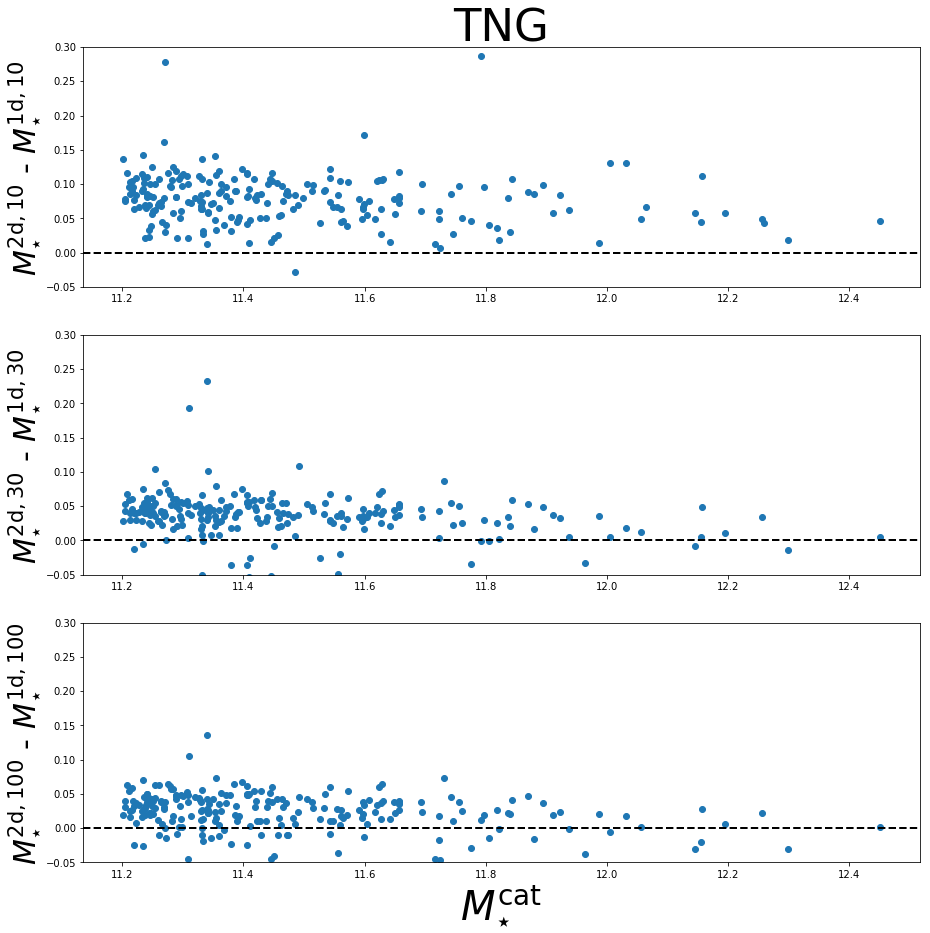

In [34]:
plt.figure(figsize=[15,15])
ax1=plt.subplot(311)
ax2=plt.subplot(312)
ax3=plt.subplot(313)

ax1.scatter(tng_m_cat[tng_diff_2d_1d_10<100], tng_diff_2d_1d_10[tng_diff_2d_1d_10<100])
# ax1.plot(xs, tng_diff_cat_post_line(xs))
ax1.axhline(0,c="k",linewidth=2,linestyle='--')
# ax1.text(12, 0.05,'linear params: ' + str(tng_diff_cat_post_params), fontsize=15)
ax1.set_ylabel(r'$M_{\star}^{\mathrm{2d, 10}}$ - $M_{\star}^{\mathrm{1d, 10}}$ ', fontsize=30)

ax2.scatter(tng_m_cat[tng_diff_2d_1d_30<100], tng_diff_2d_1d_30[tng_diff_2d_1d_30<100])
# ax2.plot(xs, tng_diff_cat_post_icl_line(xs))
ax2.axhline(0,c="k",linewidth=2,linestyle='--')
# ax2.text(12, 0.05,'linear params: ' + str(tng_diff_cat_post_icl_params), fontsize=15)
ax2.set_ylabel(r'$M_{\star}^{\mathrm{2d, 30}}$ - $M_{\star}^{\mathrm{1d, 30}}$ ', fontsize=30)

ax3.scatter(tng_m_cat[tng_diff_2d_1d_100<100], tng_diff_2d_1d_100[tng_diff_2d_1d_100<100])
# ax3.plot(xs, tng_diff_cat_1d100_line(xs))
ax3.axhline(0, c="k",linewidth=2, linestyle='--')
# ax3.text(12, 0.05,'linear params: ' + str(tng_diff_cat_1d100_params), fontsize=15)
ax3.set_ylabel(r'$M_{\star}^{\mathrm{2d, 100}}$ - $M_{\star}^{\mathrm{1d, 100}}$ ', fontsize=30)




ax3.set_xlabel('$M_{\star}^{\mathrm{cat}}$', fontsize=40)
ax1.set_title('TNG', fontsize=45)
#plt.tight_layout()

for ax in [ax1,ax2,ax3]:
    ax.set_ylim([-0.05,0.3])

# Check at very large aperture: 500kpc 

In [53]:
import sep

def find_closest(objects, x0=100., y0=100.):
    xs=objects['x']
    ys=objects['y']
    distances=np.sqrt(((xs-x0)**2) + ((ys-y0)**2))

    closest_index=np.argmin(distances)

    return objects[closest_index]

def get_mass_maps(sim_file, gal_n=0):

    # Load general simulation and galaxy properties
    f = h5py.File(sim_file, 'r')
    cat_sh_mstar = np.array(f['catsh_SubhaloMassType'][:, 4])

    cen_insitu = np.array(f['map_star_rho_insitu_xy'])
    cen_exsitu = np.array(f['map_star_rho_exsitu_xy'])
    map_stars_cen = cen_exsitu + cen_insitu

    fuzz_insitu = np.array(f['map_star_rho_fuzz_insitu_xy'])
    fuzz_exsitu = np.array(f['map_star_rho_fuzz_exsitu_xy'])
    map_stars_fuzz = fuzz_exsitu + fuzz_insitu

    sats_insitu = np.array(f['map_star_rho_oshs_insitu_xy'])
    sats_exsitu = np.array(f['map_star_rho_oshs_exsitu_xy'])
    map_stars_sats = sats_exsitu + sats_insitu

    map_size = f['config'].attrs['map_range_min']
    n_pixels = f['config'].attrs['map_npixel']
    pixel_scale=2 * (map_size/n_pixels)

    f.close()

    #make maps
    img_cen = map_stars_cen[gal_n] * (pixel_scale ** 2) # Central
    img_sat = map_stars_sats[gal_n] * (pixel_scale ** 2) # Satellites
    img_icl = map_stars_fuzz[gal_n] * (pixel_scale ** 2) # Diffuse
    img_cen_sat = (img_cen + img_sat)           # Central + Satellites
    img_cen_icl = (img_cen + img_icl)           # Central + Satellites
    img_all = (img_cen + img_sat + img_icl)           # Central + Satellites + Diffuse

    #catalog mass
    m_cat = np.log10(cat_sh_mstar[gal_n])

    return img_cen, img_cen_icl, pixel_scale, m_cat

def get_2d_masses(sim_file, sim_name, gal_n=0):
    
    #central pixels
    x0=150.
    y0=150.

    # Load maps
    mass_map_cen, mass_map_cen_icl, pixel_scale, m_cat = get_mass_maps(sim_file, gal_n=gal_n)

    #postage mass
    m_post = np.log10(np.sum(mass_map_cen))
    m_post_icl = np.log10(np.sum(mass_map_cen_icl))


    #ouput maps
    maps_location='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/quick_800/'

    file_name=sim_name+'_'+str(gal_n)+'_xy'
    fits_prefix = maps_location + file_name
    #save_to_fits(mass_map_cen, fits_prefix + '_cen.fits')
    # save_to_fits(img_cen_sat, fits_prefix + '_cen_sat.fits')
    # save_to_fits(img_cen_icl, fits_prefix + '_cen_icl.fits')
    # save_to_fits(img_all, fits_prefix + '_all.fits')

    data=mass_map_cen
    suffix='_cen'

    ###########################################################################
    #get background
    bkg = sep.Background(data, bw=10, bh=10, fw=5, fh=5)
    bkg_subtraced_data = data - bkg

    thresh = 50 * bkg.globalrms
    objects = sep.extract(bkg_subtraced_data, thresh, minarea = 100,
                          deblend_nthresh=24, deblend_cont=0.1)

    #find object closest to image center
    obj = find_closest(objects, x0=x0, y0=y0)

    #ellipse parameters
    theta = obj['theta']
    q = obj['b']/ obj['a']

    a_10, a_30, a_100, a_500, a_800 = (10. / pixel_scale), (30. / pixel_scale), (100. / pixel_scale),\
                                        (500. / pixel_scale), (800. / pixel_scale)
    b_10, b_30, b_100, b_500, b_800 =  a_10 * q, a_30 * q, a_100 * q, a_500 * q, a_800 * q
    
    #2D masses
    flux_10, fluxerr_10, flag_10 = sep.sum_ellipse(data, x0, y0,
                                                   a_10, b_10, theta)
    flux_30, fluxerr_30, flag_30 = sep.sum_ellipse(data, x0, y0,
                                                   a_30, b_30, theta)
    flux_100, fluxerr_100, flag_100 = sep.sum_ellipse(data, x0, y0,
                                                      a_100, b_100, theta)
    flux_500, fluxerr_500, flag_500 = sep.sum_ellipse(data, x0, y0,
                                                      a_500, b_500, theta)
    flux_800, fluxerr_800, flag_800 = sep.sum_ellipse(data, x0, y0,
                                                      a_800, b_800, theta)
    
    m_2d_10, m_2d_30, m_2d_100, m_2d_500, m_2d_800 = np.log10(flux_10), \
                                                        np.log10(flux_30), \
                                                        np.log10(flux_100), \
                                                        np.log10(flux_500), \
                                                        np.log10(flux_800)


    masses = [m_2d_10,m_2d_30, m_2d_100, m_2d_500, m_2d_800]

    return masses

In [45]:
Illustris_file_quick = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/galaxies_stellarmaps_orig_11.2.hdf5'
TNG_file_quick = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/galaxies_stellarmaps_tng75_11.2.hdf5'

In [54]:
i=0
illustris_2d_masses = get_2d_masses(Illustris_file_quick,'Illustris',gal_n=i)
tng_2d_masses = get_2d_masses(TNG_file_quick,'TNG',gal_n=i)

In [56]:
illustris_2d_masses=[]

for i in range(339):  

    print(i)

    illustris_2d_mass = get_2d_masses(Illustris_file_quick,'Illustris',gal_n=i)

    
    illustris_2d_masses.append(illustris_2d_mass)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [66]:
tng_2d_masses=[]

for i in range(235):  

    print(i)

    tng_2d_mass = get_2d_masses(TNG_file_quick,'TNG',gal_n=i)

    
    tng_2d_masses.append(tng_2d_mass)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234


## save masses


In [67]:
#np.save('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/illustris_2d_masses.npy',illustris_2d_masses)
#illustris_2d_masses = np.load('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/illustris_2d_masses.npy')

np.save('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/tng_2d_masses.npy',tng_2d_masses)
#tng_2d_masses = np.load('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/tng_2d_masses.npy')

## check

In [62]:
illustris_m_2d_10 = np.array([gal[0] for gal in illustris_2d_masses])
illustris_m_2d_30 = np.array([gal[1] for gal in illustris_2d_masses])
illustris_m_2d_100 = np.array([gal[2] for gal in illustris_2d_masses])
illustris_m_2d_500 = np.array([gal[3] for gal in illustris_2d_masses])
illustris_m_2d_800 = np.array([gal[4] for gal in illustris_2d_masses])

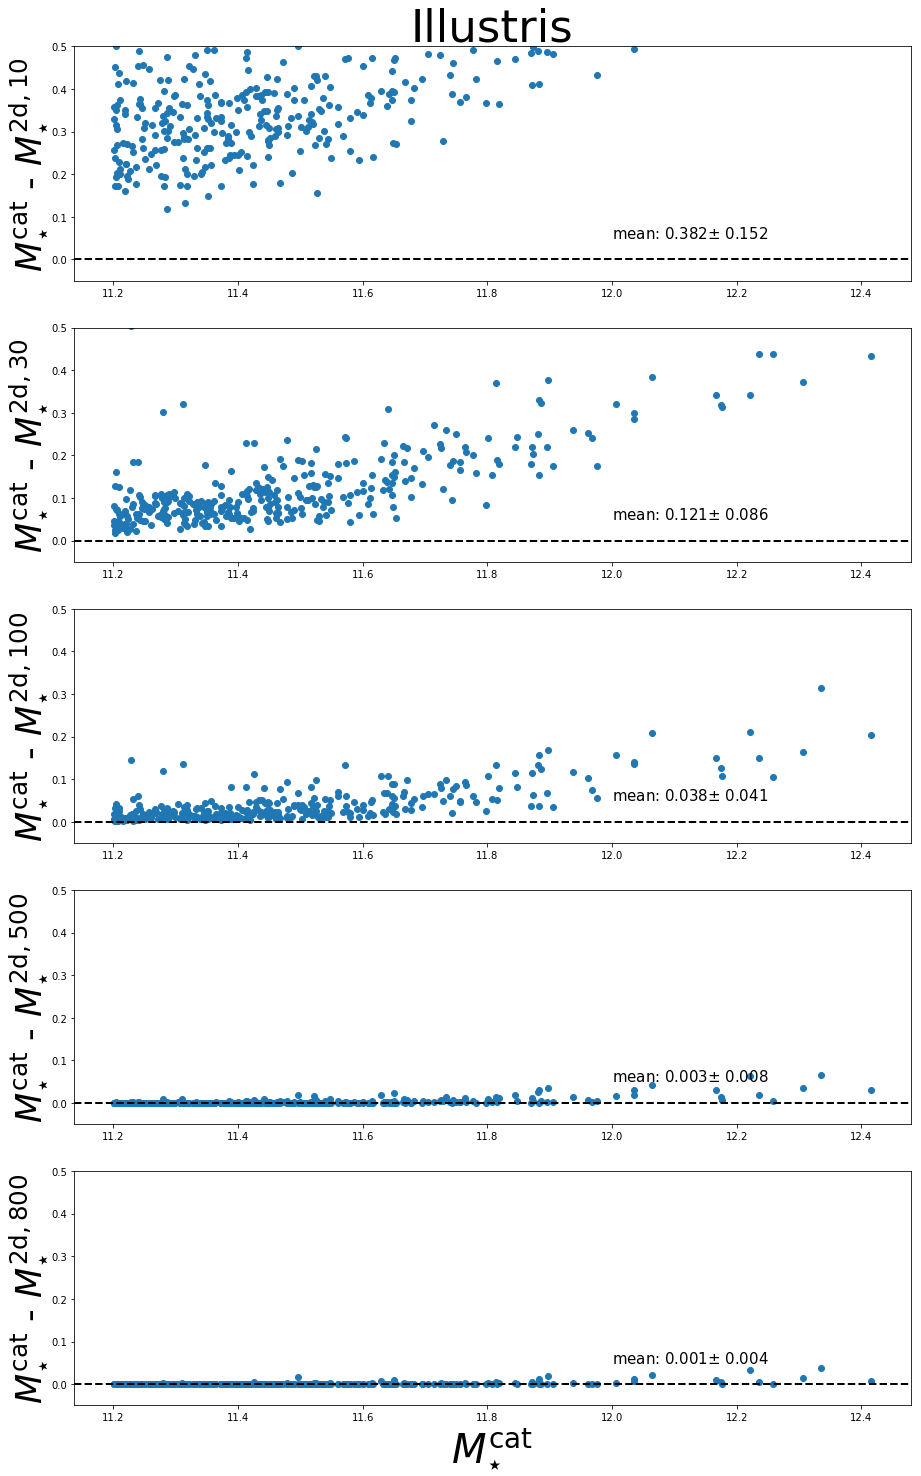

In [77]:
plt.figure(figsize=[15,25])
ax1=plt.subplot(511)
ax2=plt.subplot(512)
ax3=plt.subplot(513)
ax4=plt.subplot(514)
ax5=plt.subplot(515)


ax1.scatter(illustris_m_cat, illustris_m_cat - illustris_m_2d_10)
# ax1.plot(xs, illustris_diff_cat_post_line(xs))
ax1.axhline(0,c="k",linewidth=2,linestyle='--')
ax1.text(12, 0.05,'mean: ' + str(round(np.mean(illustris_m_cat - illustris_m_2d_10),3)) + r'$\pm$ '+\
         str(round(np.std(illustris_m_cat - illustris_m_2d_10),3)), fontsize=15)
ax1.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{2d, 10}}$', fontsize=35)

ax2.scatter(illustris_m_cat, illustris_m_cat - illustris_m_2d_30)
# ax2.plot(xs, illustris_diff_cat_post_icl_line(xs))
ax2.axhline(0,c="k",linewidth=2,linestyle='--')
ax2.text(12, 0.05,'mean: ' + str(round(np.mean(illustris_m_cat - illustris_m_2d_30),3)) + r'$\pm$ '+\
         str(round(np.std(illustris_m_cat - illustris_m_2d_30),3)), fontsize=15)
ax2.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{2d, 30}}$', fontsize=35)

ax3.scatter(illustris_m_cat, illustris_m_cat - illustris_m_2d_100)
# ax3.plot(xs, illustris_diff_cat_1d100_line(xs))
ax3.axhline(0, c="k",linewidth=2, linestyle='--')
ax3.text(12, 0.05,'mean: ' + str(round(np.mean(illustris_m_cat - illustris_m_2d_100),3)) + r'$\pm$ '+\
         str(round(np.std(illustris_m_cat - illustris_m_2d_100),3)), fontsize=15)
ax3.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{2d, 100}}$', fontsize=35)

ax4.scatter(illustris_m_cat, illustris_m_cat - illustris_m_2d_500)
# ax4.plot(xs, illustris_diff_2d_1d_30_line(xs))
ax4.axhline(0,c="k",linewidth=2,linestyle='--')
ax4.text(12, 0.05,'mean: ' + str(round(np.mean(illustris_m_cat - illustris_m_2d_500),3)) + r'$\pm$ '+\
         str(round(np.std(illustris_m_cat - illustris_m_2d_500),3)), fontsize=15)
ax4.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{2d, 500}}$', fontsize=35)

ax5.scatter(illustris_m_cat, illustris_m_cat - illustris_m_2d_800)
# ax5.plot(xs, illustris_diff_cat_1dextrap_line(xs))
ax5.axhline(0,c="k",linewidth=2,linestyle='--')
ax5.text(12, 0.05,'mean: ' + str(round(np.mean(illustris_m_cat - illustris_m_2d_800),3)) + r'$\pm$ '+\
         str(round(np.std(illustris_m_cat - illustris_m_2d_800),3)), fontsize=15)
ax5.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{2d, 800}}$', fontsize=35)




ax5.set_xlabel('$M_{\star}^{\mathrm{cat}}$', fontsize=40)
ax1.set_title('Illustris', fontsize=45)
#plt.tight_layout()

for ax in [ax1,ax2,ax3,ax4,ax5]:
    ax.set_ylim([-0.05,0.5])

In [68]:
tng_m_2d_10 = np.array([gal[0] for gal in tng_2d_masses])
tng_m_2d_30 = np.array([gal[1] for gal in tng_2d_masses])
tng_m_2d_100 = np.array([gal[2] for gal in tng_2d_masses])
tng_m_2d_500 = np.array([gal[3] for gal in tng_2d_masses])
tng_m_2d_800 = np.array([gal[4] for gal in tng_2d_masses])

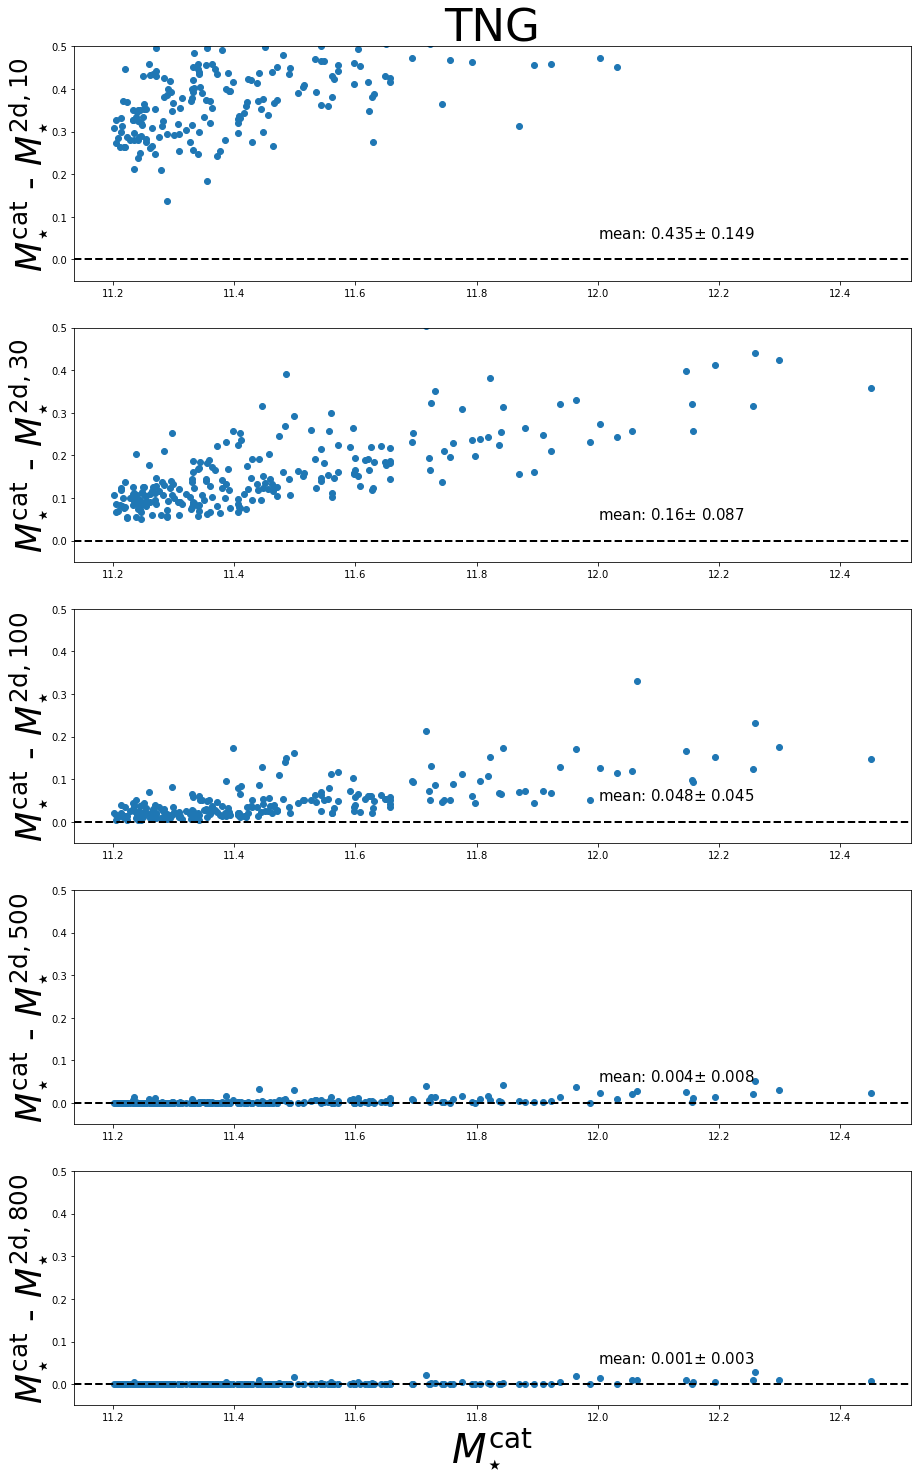

In [79]:
plt.figure(figsize=[15,25])
ax1=plt.subplot(511)
ax2=plt.subplot(512)
ax3=plt.subplot(513)
ax4=plt.subplot(514)
ax5=plt.subplot(515)


ax1.scatter(tng_m_cat, tng_m_cat - tng_m_2d_10)
# ax1.plot(xs, tng_diff_cat_post_line(xs))
ax1.axhline(0,c="k",linewidth=2,linestyle='--')
ax1.text(12, 0.05,'mean: ' + str(round(np.mean(tng_m_cat - tng_m_2d_10),3)) + r'$\pm$ '+\
         str(round(np.std(tng_m_cat - tng_m_2d_10),3)), fontsize=15)
ax1.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{2d, 10}}$', fontsize=35)

ax2.scatter(tng_m_cat, tng_m_cat - tng_m_2d_30)
# ax2.plot(xs, tng_diff_cat_post_icl_line(xs))
ax2.axhline(0,c="k",linewidth=2,linestyle='--')
ax2.text(12, 0.05,'mean: ' + str(round(np.mean(tng_m_cat - tng_m_2d_30),3)) + r'$\pm$ '+\
         str(round(np.std(tng_m_cat - tng_m_2d_30),3)), fontsize=15)
ax2.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{2d, 30}}$', fontsize=35)

ax3.scatter(tng_m_cat, tng_m_cat - tng_m_2d_100)
# ax3.plot(xs, tng_diff_cat_1d100_line(xs))
ax3.axhline(0, c="k",linewidth=2, linestyle='--')
ax3.text(12, 0.05,'mean: ' + str(round(np.mean(tng_m_cat - tng_m_2d_100),3)) + r'$\pm$ '+\
         str(round(np.std(tng_m_cat - tng_m_2d_100),3)), fontsize=15)
ax3.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{2d, 100}}$', fontsize=35)

ax4.scatter(tng_m_cat, tng_m_cat - tng_m_2d_500)
# ax4.plot(xs, tng_diff_2d_1d_30_line(xs))
ax4.axhline(0,c="k",linewidth=2,linestyle='--')
ax4.text(12, 0.05,'mean: ' + str(round(np.mean(tng_m_cat - tng_m_2d_500),3)) + r'$\pm$ '+\
         str(round(np.std(tng_m_cat - tng_m_2d_500),3)), fontsize=15)
ax4.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{2d, 500}}$', fontsize=35)

ax5.scatter(tng_m_cat, tng_m_cat - tng_m_2d_800)
# ax5.plot(xs, tng_diff_cat_1dextrap_line(xs))
ax5.axhline(0,c="k",linewidth=2,linestyle='--')
ax5.text(12, 0.05,'mean: ' + str(round(np.mean(tng_m_cat - tng_m_2d_800),3)) + r'$\pm$ '+\
         str(round(np.std(tng_m_cat - tng_m_2d_800),3)), fontsize=15)
ax5.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{2d, 800}}$', fontsize=35)




ax5.set_xlabel('$M_{\star}^{\mathrm{cat}}$', fontsize=40)
ax1.set_title('TNG', fontsize=45)
#plt.tight_layout()

for ax in [ax1,ax2,ax3,ax4,ax5]:
    ax.set_ylim([-0.05,0.5])